**Convolutional Neural Network**

  Uma rede neural convolucional ou CNN (Convolutional Neural Network) é uma rede neural que é utilizada para processar estruturas em grades, como imagens. Assim como realizamos para construir um perceptron, a estrutura de uma CNN é composta por camadas, as quais cada uma delas realiza uma tarefa específica.

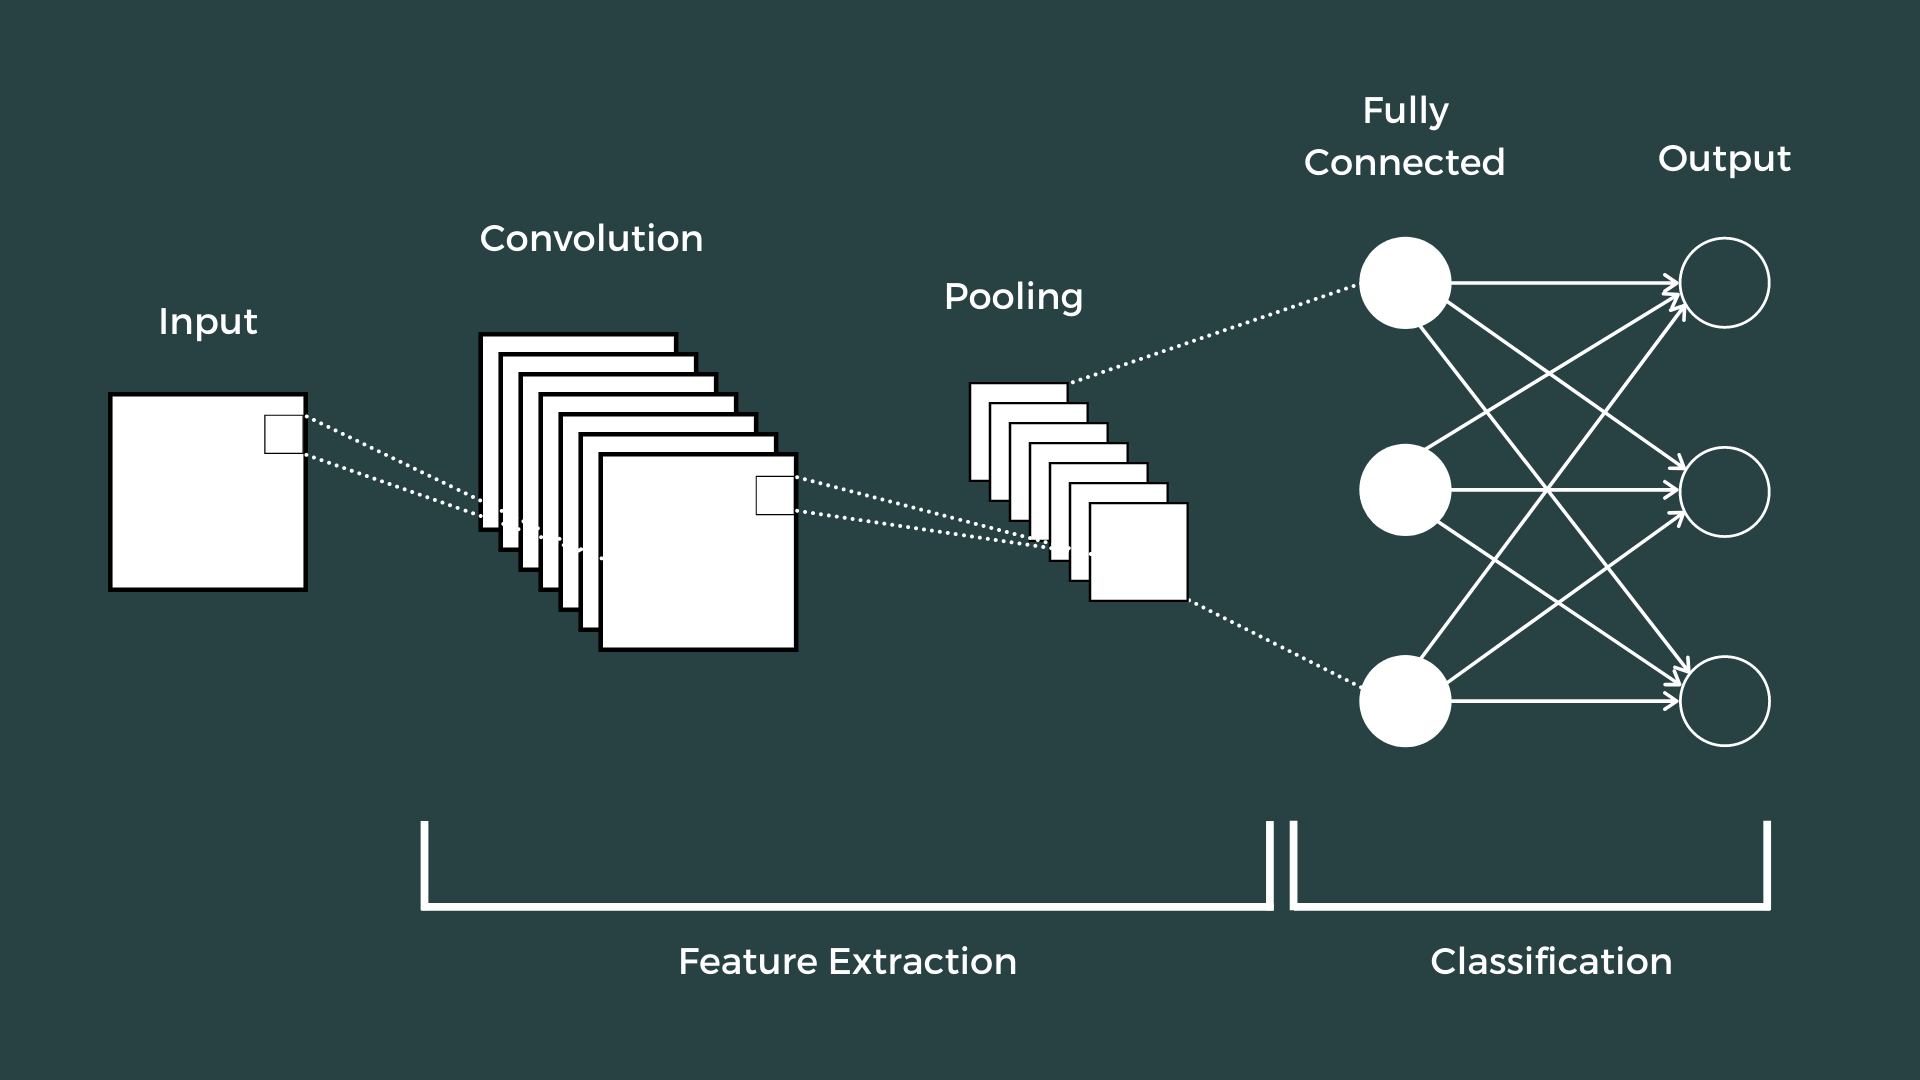

 Diferentemente dos outros modelos de redes neurais, nos é introduzido na primeira camada de uma CNN, geralmente, uma camada convolucional, a qual aplica um filtro à imagem de entrada e extrai característicadela. A saída desta camada é um mapa de características que representa as características importantes da imagem.
  A camada convolucional é seguida por uma camada de pool, onde será reduzido o tamanho do mapa de caractéristicas, filtrando ainda mais as características importantes.
  As últimas camadas são camadas totalmente conectadas, essas sim são semelhantes a camadas de uma rede neural tradicional. Eles pegam a saída das camadas convolucionais e classificam a imagem de entrada.

**Preparação de dados**

In [1]:
import os

def prepare_directories_for_tensorflow(data_dir, class_names):


  for class_name in class_names:
    if not os.path.exists(os.path.join(data_dir, class_name)):
      os.mkdir(os.path.join(data_dir, class_name))

    filenames_file = open(os.path.join(data_dir, class_name, "filenames.txt"), "w")

    for filename in os.listdir(os.path.join(data_dir, class_name)):
      filenames_file.write(filename + "\n")

    filenames_file.close()


data_dir = "C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals"

class_names = ["cats", "dogs","pandas"]

prepare_directories_for_tensorflow(data_dir, class_names)

In [2]:
print(data_dir)

C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals


In [3]:
print(class_names)

['cats', 'dogs', 'pandas']


**Definição do modelo**

In [4]:
import tensorflow as tf

class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dense2 = tf.keras.layers.Dense(4, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return x

#Compilação do modelo com um otimizador, função de perde e métricas accuracy
model = MyModel()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

data_dir = "C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals"

# Carregamento dos dados de treino e validação

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    zoom_range=(0.8, 1.2)
).flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training',
    class_mode='categorical', 
    shuffle=True
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
).flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation',
    class_mode='categorical' 
)


model.fit(train_data, epochs=20)

result1 = model.evaluate(validation_data)

print(result1)

Found 2400 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/20
75/75 [==============================] - 22s 285ms/step - loss: 1.0192 - accuracy: 0.5117
Epoch 2/20
75/75 [==============================] - 19s 247ms/step - loss: 0.7629 - accuracy: 0.6354
Epoch 3/20
75/75 [==============================] - 17s 222ms/step - loss: 0.6917 - accuracy: 0.6692
Epoch 4/20
75/75 [==============================] - 17s 223ms/step - loss: 0.6351 - accuracy: 0.6963
Epoch 5/20
75/75 [==============================] - 19s 257ms/step - loss: 0.5813 - accuracy: 0.7417
Epoch 6/20
75/75 [==============================] - 18s 236ms/step - loss: 0.5519 - accuracy: 0.7454
Epoch 7/20
75/75 [==============================] - 17s 219ms/step - loss: 0.5029 - accuracy: 0.7796
Epoch 8/20
75/75 [==============================] - 16s 219ms/step - loss: 0.4649 - accuracy: 0.7917
Epoch 9/20
75/75 [==============================] - 16s 214ms/step - loss: 0.4467 - accuracy: 0.8042
Epoch 10

**Utilização de uma rede pré treinada e avaliar no dataset**


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# carregar o modelo ResNet50 com pesos pré-treinados
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(64, 64, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(4, activation='softmax')(x)

# novo modelo
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar o modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

data_dir = "C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals"

train_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    zoom_range=(0.8, 1.2)
).flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training',
    class_mode='categorical',  
    shuffle=True
)

validation_data = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
).flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)


model.fit(train_data, epochs=20)

result2 = model.evaluate(validation_data)
print(result2)

Found 2400 images belonging to 4 classes.
Found 600 images belonging to 4 classes.
Epoch 1/20
75/75 [==============================] - 172s 2s/step - loss: 1.1182 - accuracy: 0.6450
Epoch 2/20
75/75 [==============================] - 165s 2s/step - loss: 0.7442 - accuracy: 0.7133
Epoch 3/20
75/75 [==============================] - 165s 2s/step - loss: 0.6223 - accuracy: 0.7367
Epoch 4/20
75/75 [==============================] - 193s 3s/step - loss: 0.5584 - accuracy: 0.7629
Epoch 5/20
75/75 [==============================] - 171s 2s/step - loss: 0.4353 - accuracy: 0.8200
Epoch 6/20
75/75 [==============================] - 171s 2s/step - loss: 0.3598 - accuracy: 0.8542
Epoch 7/20
75/75 [==============================] - 172s 2s/step - loss: 0.3469 - accuracy: 0.8592
Epoch 8/20
75/75 [==============================] - 176s 2s/step - loss: 0.2651 - accuracy: 0.8946
Epoch 9/20
75/75 [==============================] - 174s 2s/step - loss: 0.2221 - accuracy: 0.9137
Epoch 10/20
75/75 [=======

**Comparar métodos**

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

models = ['MyModel', 'ResNet50']

accuracies = [result1[1], result2[1]]

losses = [result1[0], result2[0]]

plt.plot(models, accuracies, label='Accuracy')
plt.plot(models, losses, label='Loss')
plt.xlabel('Model')
pltylabel('Value')
plt.title('Comparison of Model Results')
plt.legend(loc='upper left')
plt.show()

**Avaliar métodos de regularização e data argumentation**

In [6]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def prepare_directories_for_tensorflow(data_dir, class_names):
    # Crie um diretório para cada classe.
    for class_name in class_names:
        # Verifique se o diretório já existe.
        if not os.path.exists(os.path.join(data_dir, class_name)):
            os.mkdir(os.path.join(data_dir, class_name))

        # Crie um arquivo `filenames.txt` para cada classe.
        filenames_file = open(os.path.join(data_dir, class_name, "filenames.txt"), "w")

        # Percorra os arquivos de imagens da classe.
        for filename in os.listdir(os.path.join(data_dir, class_name)):
            # Adicione o nome do arquivo ao arquivo `filenames.txt`.
            filenames_file.write(filename + "\n")

        filenames_file.close()

# Diretório que contém os arquivos de dados.
data_dir = "C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals"

# Lista de nomes de classes.
class_names = ["cats", "dogs", "pandas"]

# Prepare os diretórios dos arquivos.
prepare_directories_for_tensorflow(data_dir, class_names)

# Configuração do data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    zoom_range=(0.8, 1.2),
    rotation_range=20,  # Rotações de até 20 graus
    width_shift_range=0.2,  # Deslocamento horizontal máximo de 20% da largura
    height_shift_range=0.2,  # Deslocamento vertical máximo de 20% da altura
    shear_range=0.2,  # Inclinação máxima de 20 graus
    horizontal_flip=True  # Virar horizontalmente aleatoriamente
)

# Carregue os dados de treinamento com data augmentation
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

# Defina o modelo

class MyModel2(tf.keras.Model):
    def __init__(self):
        super(MyModel2, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dropout = Dropout(0.5)  # Adicione a camada Dropout com a taxa desejada
        self.dense2 = tf.keras.layers.Dense(4, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)  # Adicione a camada de Dropout aqui
        x = self.dense2(x)
        return x

# Crie uma instância do modelo
model = MyModel2()

# Compile o modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Treine o modelo por 20 épocas
model.fit(train_data, epochs=20)

# Avalie o modelo
result3 = model.evaluate(validation_data)
print(result3)

Found 2400 images belonging to 4 classes.
Epoch 1/20
75/75 [==============================] - 16s 192ms/step - loss: 1.0592 - accuracy: 0.4779
Epoch 2/20
75/75 [==============================] - 18s 234ms/step - loss: 0.8765 - accuracy: 0.5650
Epoch 3/20
75/75 [==============================] - 17s 230ms/step - loss: 0.8313 - accuracy: 0.5896
Epoch 4/20
75/75 [==============================] - 17s 229ms/step - loss: 0.7786 - accuracy: 0.6104
Epoch 5/20
75/75 [==============================] - 17s 231ms/step - loss: 0.7555 - accuracy: 0.6196
Epoch 6/20
75/75 [==============================] - 17s 227ms/step - loss: 0.7483 - accuracy: 0.6413
Epoch 7/20
75/75 [==============================] - 17s 229ms/step - loss: 0.7254 - accuracy: 0.6425
Epoch 8/20
75/75 [==============================] - 18s 236ms/step - loss: 0.6991 - accuracy: 0.6687
Epoch 9/20
75/75 [==============================] - 17s 230ms/step - loss: 0.6967 - accuracy: 0.6721
Epoch 10/20
75/75 [==============================

**Avaliar método com data argumentation**

In [8]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

def prepare_directories_for_tensorflow(data_dir, class_names):
    # Crie um diretório para cada classe.
    for class_name in class_names:
        # Verifique se o diretório já existe.
        if not os.path.exists(os.path.join(data_dir, class_name)):
            os.mkdir(os.path.join(data_dir, class_name))

        # Crie um arquivo `filenames.txt` para cada classe.
        filenames_file = open(os.path.join(data_dir, class_name, "filenames.txt"), "w")

        # Percorra os arquivos de imagens da classe.
        for filename in os.listdir(os.path.join(data_dir, class_name)):
            # Adicione o nome do arquivo ao arquivo `filenames.txt`.
            filenames_file.write(filename + "\n")

        filenames_file.close()

# Diretório que contém os arquivos de dados.
data_dir = "C:/Users/ADM/OneDrive/Documentos/IEEE CIS UnB/DataSets/animals"

# Lista de nomes de classes.
class_names = ["cats", "dogs", "pandas"]

# Prepare os diretórios dos arquivos.
prepare_directories_for_tensorflow(data_dir, class_names)

# Configuração do data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    validation_split=0.2,
    zoom_range=(0.8, 1.2),
    rotation_range=20,  # Rotações de até 20 graus
    width_shift_range=0.2,  # Deslocamento horizontal máximo de 20% da largura
    height_shift_range=0.2,  # Deslocamento vertical máximo de 20% da altura
    shear_range=0.2,  # Inclinação máxima de 20 graus
    horizontal_flip=True  # Virar horizontalmente aleatoriamente
)

# Carregue os dados de treinamento com data augmentation
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(64, 64),
    batch_size=32,
    subset='training',
    class_mode='categorical',
    shuffle=True
)

# Defina o modelo

class MyModel3(tf.keras.Model):
    def __init__(self):
        super(MyModel3, self).__init__()
        self.conv1 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3))
        self.pool1 = tf.keras.layers.MaxPooling2D((2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu')
        self.pool2 = tf.keras.layers.MaxPooling2D((2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dense1 = tf.keras.layers.Dense(256, activation='relu')
        self.dropout = Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(4, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dropout(x)
        x = self.dense2(x)
        return x

# Crie uma instância do modelo
model = MyModel3()

# Compile o modelo
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# Treine o modelo por 20 épocas
model.fit(train_data, epochs=20)

# Avalie o modelo
result4 = model.evaluate(validation_data)
print(result4)




Found 2400 images belonging to 4 classes.
Epoch 1/20
75/75 [==============================] - 15s 196ms/step - loss: 1.1319 - accuracy: 0.4538
Epoch 2/20
75/75 [==============================] - 15s 198ms/step - loss: 0.8821 - accuracy: 0.5600
Epoch 3/20
75/75 [==============================] - 16s 209ms/step - loss: 0.8156 - accuracy: 0.5850
Epoch 4/20
75/75 [==============================] - 16s 210ms/step - loss: 0.7672 - accuracy: 0.6133
Epoch 5/20
75/75 [==============================] - 16s 207ms/step - loss: 0.7569 - accuracy: 0.6542
Epoch 6/20
75/75 [==============================] - 16s 212ms/step - loss: 0.7386 - accuracy: 0.6575
Epoch 7/20
75/75 [==============================] - 17s 228ms/step - loss: 0.7319 - accuracy: 0.6454
Epoch 8/20
75/75 [==============================] - 17s 231ms/step - loss: 0.7112 - accuracy: 0.6617
Epoch 9/20
75/75 [==============================] - 17s 222ms/step - loss: 0.7054 - accuracy: 0.6750
Epoch 10/20
75/75 [==============================

**Comparar métodos**

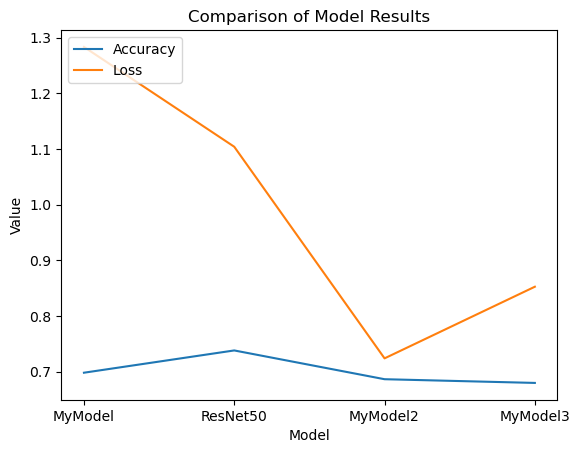

In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf

models = ['MyModel', 'ResNet50','MyModel2','MyModel3']

accuracies = [result1[1], result2[1],result3[1],result4[1]]

losses = [result1[0], result2[0],result3[0],result4[0]]

plt.plot(models, accuracies, label='Accuracy')
plt.plot(models, losses, label='Loss')
plt.xlabel('Model')
plt.ylabel('Value')
plt.title('Comparison of Model Results')
plt.legend(loc='upper left')
plt.show()

**Conclusão**

Podemos concluir que o melhor modelo para utilizar é o modelo ResNet50, com a melhor acurácia entre os modelos com acurácia de 0.7383.